# 텐서플로 첫걸음
* 5쇄 2017.03.10

In [1]:
# first tensorflow code
import tensorflow as tf

# tf.placeholder: symbolic variable. can change value when program is running
a = tf.placeholder("float")
b = tf.placeholder("float")

# Tensor calculation operation
# Tensor: dynmaic  size multi-dimension array
y = tf.multiply(a,b)
# basic operations and matrix operation.

# make session
# sesstion interact with tensorflow library
sess = tf.Session()
# tf.interactionSession : 대화형 환경 (~~ ipython)

# run the session
print(sess.run(y, feed_dict = {a:3, b:3}))

C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MBIS\anaconda3\envs\tensorfl

9.0


In [2]:
# model about relationship inbetween variables
import numpy as np
num_points =1000
vectors_set=[]
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1,y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

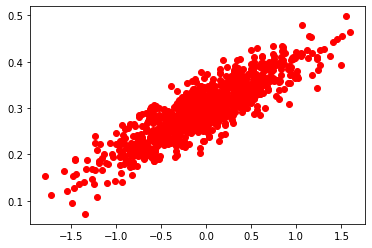

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

In [4]:
# cost function and gradient descent algorithm

# cost function: error function
# * here is mean square error

import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W*x_data + b

C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MBIS\anaconda3\envs\tensorfl

In [5]:
# y: calculated y. y_data: known data. 
loss = tf.reduce_mean(tf.square(y-y_data))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [16]:
for step in range(8):
    sess.run(train)
print(sess.run(W), sess.run(b))

[0.09970623] [0.30002704]


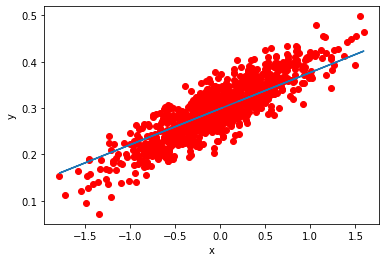

In [9]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0 [0.4832415] [0.32610187] 0.045295592


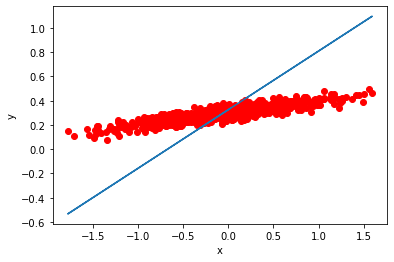

1 [0.3680533] [0.31756252] 0.022622207


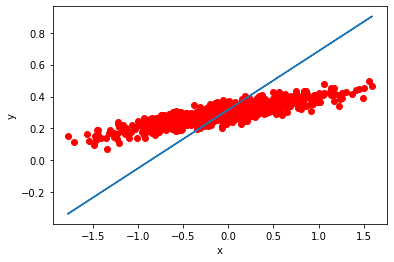

2 [0.28742725] [0.31229603] 0.011527054


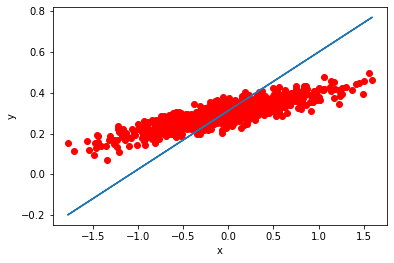

3 [0.23102552] [0.30860972] 0.0060974304


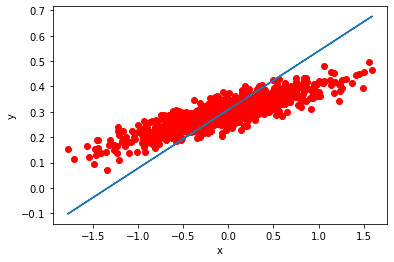

4 [0.19156975] [0.30603102] 0.0034403417


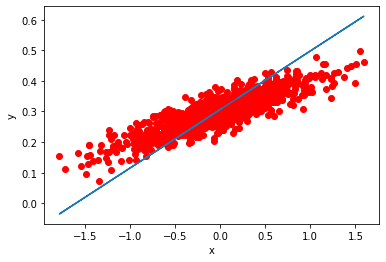

5 [0.1639685] [0.30422705] 0.0021400454


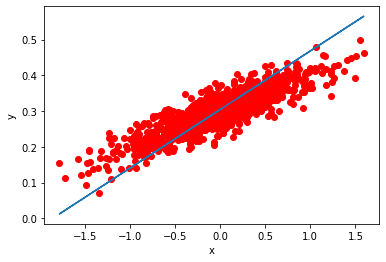

6 [0.14466007] [0.3029651] 0.0015037203


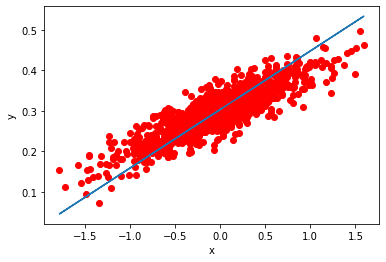

7 [0.13115287] [0.3020823] 0.0011923224


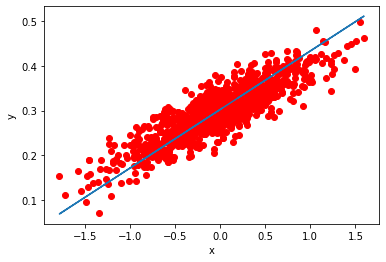

In [23]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()